In [ ]:
# Pacotes
!pip install basedosdados
!pip install -q streamlit
!npm install localtunnel

In [ ]:
# Importaçoes
import basedosdados as bd
import numba
import pandas as pd
import streamlit as st
import numpy as np
from matplotlib import pyplot as plt
from numba import njit

In [ ]:
# Baixar a base de dados
agencias = bd.read_table(dataset_id='br_bcb_agencia', table_id='agencia',
  billing_project_id="projetox-400515", limit=100000)

Downloading: 100%|██████████| 100000/100000 [00:16<00:00, 6238.05rows/s]


In [ ]:
agencias.shape
agencias.head(5)
agencias.dropna()
agencias.to_csv("Database.csv", index=False)
agencias[["id_municipio", "sigla_uf", "nome_agencia", "instituicao", "segmento"]].to_csv("Database_filter.csv", index=False)

# Ler o banco de dados filtrado
df = pd.read_csv("Database_filter.csv")
# Limpar os campos vazios
df = df.dropna(subset=["sigla_uf"])

In [ ]:
# Contagem das agencias por estado
contagem_por_estado = df["sigla_uf"].value_counts()
# Ordene o resultado em ordem alfabética das siglas
contagem_por_estado = contagem_por_estado.sort_index()
# print(contagem_por_estado)

In [ ]:
# Crie um DataFrame para a distribuição de frequência
tabela_frequencia = pd.DataFrame({
    "Estado": contagem_por_estado.index,
    "Frequência": contagem_por_estado.values
})

# Exiba a tabela de distribuição de frequência
# print(tabela_frequencia)

In [ ]:
# Cálculo das estatísticas descritivas
media = contagem_por_estado.mean()
mediana = contagem_por_estado.median()
desvio_padrao = contagem_por_estado.std()
primeiro_quartil = contagem_por_estado.quantile(0.25)
terceiro_quartil = contagem_por_estado.quantile(0.75)

# Exiba as estatísticas descritivas
print("Estatísticas Descritivas:")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Primeiro Quartil (Q1): {primeiro_quartil}")
print(f"Terceiro Quartil (Q3): {terceiro_quartil}")

Estatísticas Descritivas:
Média: 4165.041666666667
Mediana: 2421.0
Desvio Padrão: 4466.637140625427
Primeiro Quartil (Q1): 1369.5
Terceiro Quartil (Q3): 4436.75


In [ ]:
# Cálculo das medidas de tendência central
media = contagem_por_estado.mean()
mediana = contagem_por_estado.median()
moda = contagem_por_estado.mode()

# Exiba as medidas de tendência central
print("Medidas de Tendência Central:")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda[0]}")  # A moda pode ter múltiplos valores, pegamos o primeiro da lista

Medidas de Tendência Central:
Média: 4165.041666666667
Mediana: 2421.0
Moda: 231


In [ ]:
# Cálculo das medidas de variabilidade
amplitude = contagem_por_estado.max() - contagem_por_estado.min()
variancia = contagem_por_estado.var()
desvio_padrao = contagem_por_estado.std()

# Exiba as medidas de variabilidade
print("Medidas de Variabilidade:")
print(f"Amplitude: {amplitude}")
print(f"Variância: {variancia}")
print(f"Desvio Padrão: {desvio_padrao}")

Medidas de Variabilidade:
Amplitude: 14822
Variância: 19950847.34601449
Desvio Padrão: 4466.637140625427


In [ ]:
# Cálculo dos quartis
q1 = contagem_por_estado.quantile(0.25)
q2 = contagem_por_estado.quantile(0.50)
q3 = contagem_por_estado.quantile(0.75)

# Exiba os quartis
print("Quartis:")
print(f"Primeiro Quartil (Q1): {q1}")
print(f"Mediana (Q2): {q2}")
print(f"Terceiro Quartil (Q3): {q3}")

Quartis:
Primeiro Quartil (Q1): 1369.5
Mediana (Q2): 2421.0
Terceiro Quartil (Q3): 4436.75


In [ ]:
# Conte a frequência de cada estado
contagem_por_estado = df["sigla_uf"].value_counts()

# Cálculo do coeficiente de assimetria (coeficiente de Pearson)
coeficiente_assimetria = contagem_por_estado.skew()

# Exiba o coeficiente de assimetria
print("Coeficiente de Assimetria (Pearson):", coeficiente_assimetria)

Coeficiente de Assimetria (Pearson): 1.574513508289889


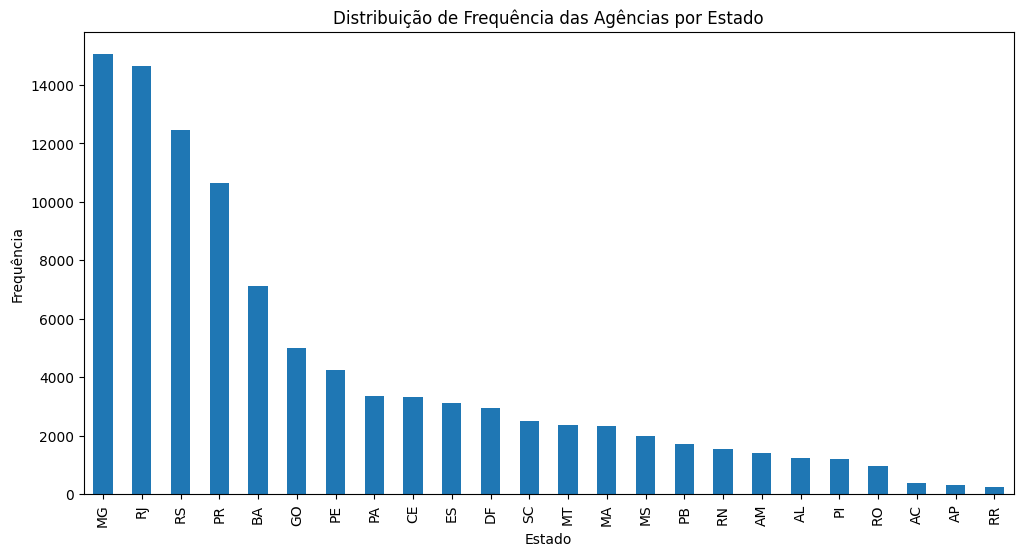

In [ ]:
# Crie um gráfico de barras min
plt.figure(figsize=(12, 6))
contagem_por_estado.plot(kind="bar")
plt.title("Distribuição de Frequência das Agências por Estado")
plt.xlabel("Estado")
plt.ylabel("Frequência")
plt.show()

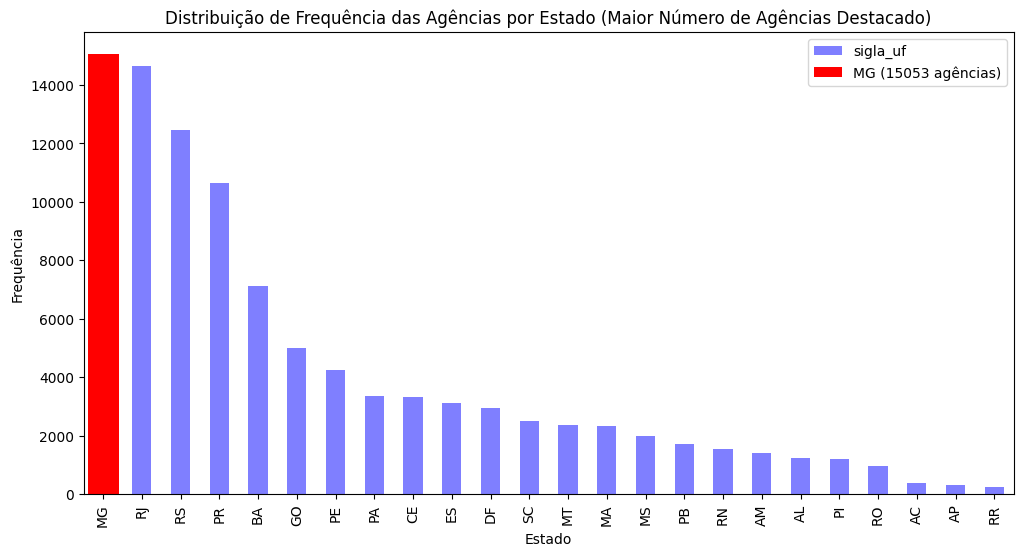

In [ ]:
estado_max_agencias = contagem_por_estado.idxmax()
max_agencias = contagem_por_estado.max()

# Crie um gráfico de barras destacando o estado com o maior número de agências
plt.figure(figsize=(12, 6))
contagem_por_estado.plot(kind="bar", color='b', alpha=0.5)
plt.bar(estado_max_agencias, max_agencias, color='r', label=f"{estado_max_agencias} ({max_agencias} agências)")
plt.title("Distribuição de Frequência das Agências por Estado (Maior Número de Agências Destacado)")
plt.xlabel("Estado")
plt.ylabel("Frequência")
plt.legend()
plt.show()

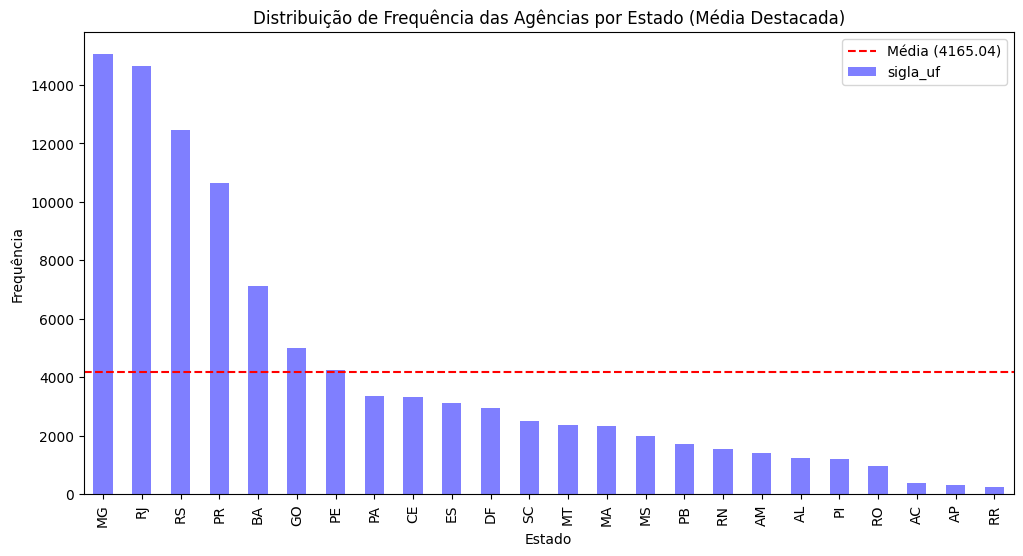

In [ ]:
# Cálculo da média
media = contagem_por_estado.mean()

# Crie um gráfico de barras com a média
plt.figure(figsize=(12, 6))
contagem_por_estado.plot(kind="bar", color='b', alpha=0.5)
plt.axhline(y=media, color='r', linestyle='--', label=f"Média ({media:.2f})")
plt.title("Distribuição de Frequência das Agências por Estado (Média Destacada)")
plt.xlabel("Estado")
plt.ylabel("Frequência")
plt.legend()
plt.show()

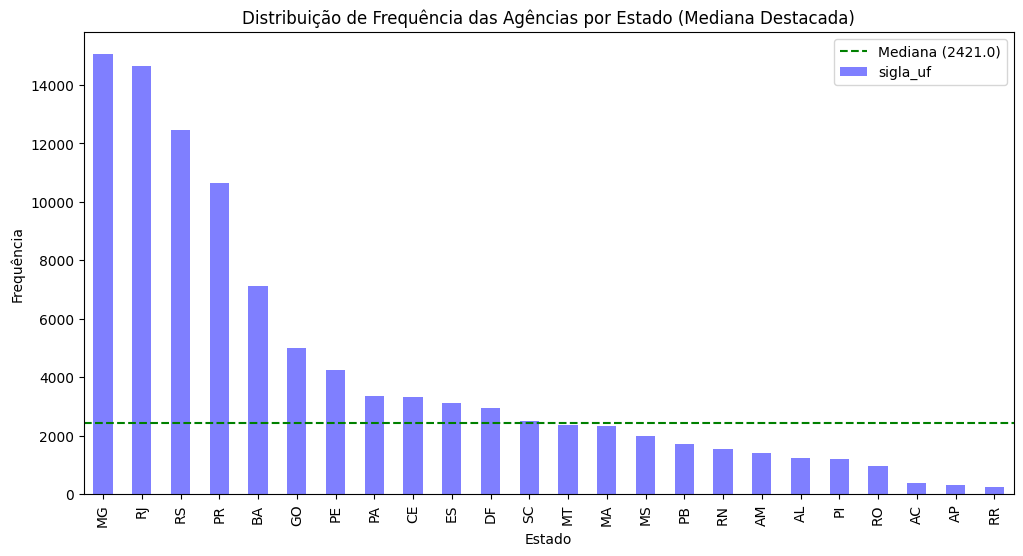

In [ ]:
# Cálculo da mediana
mediana = contagem_por_estado.median()

# Crie um gráfico de barras com a mediana
plt.figure(figsize=(12, 6))
contagem_por_estado.plot(kind="bar", color='b', alpha=0.5)
plt.axhline(y=mediana, color='g', linestyle='--', label=f"Mediana ({mediana})")
plt.title("Distribuição de Frequência das Agências por Estado (Mediana Destacada)")
plt.xlabel("Estado")
plt.ylabel("Frequência")
plt.legend()
plt.show()

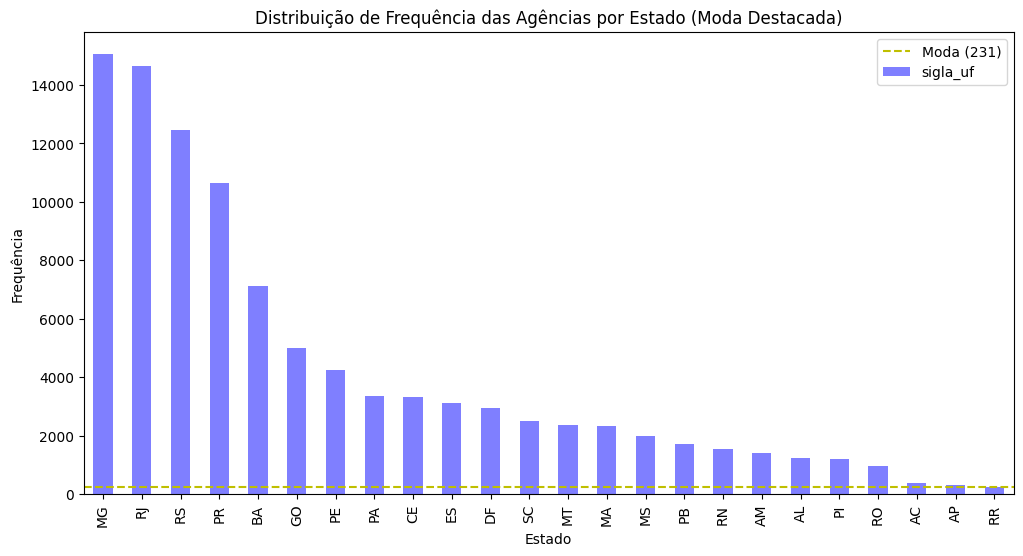

In [ ]:
# Cálculo da moda
moda = contagem_por_estado.mode().values[0]

# Crie um gráfico de barras com a moda
plt.figure(figsize=(12, 6))
contagem_por_estado.plot(kind="bar", color='b', alpha=0.5)
plt.axhline(y=moda, color='y', linestyle='--', label=f"Moda ({moda})")
plt.title("Distribuição de Frequência das Agências por Estado (Moda Destacada)")
plt.xlabel("Estado")
plt.ylabel("Frequência")
plt.legend()
plt.show()

In [ ]:
# Principal
%%writefile app.py
# Importaçoes
import basedosdados as bd
import numba
import pandas as pd
import streamlit as st
import numpy as np
from matplotlib import pyplot as plt
from numba import njit

# Baixar a base de dados
agencias = bd.read_table(dataset_id='br_bcb_agencia', table_id='agencia',
  billing_project_id="angelic-goods-350021", limit=100000)

agencias.shape
agencias.head(5)
agencias.dropna()
agencias.to_csv("Database.csv", index=False)
agencias[["id_municipio", "sigla_uf", "nome_agencia", "instituicao", "segmento"]].to_csv("Database_filter.csv", index=False)

# Ler o banco de dados filtrado
df = pd.read_csv("Database_filter.csv")
# Limpar os campos vazios
df = df.dropna(subset=["sigla_uf"])

# Contagem das agencias por estado
contagem_por_estado = df["sigla_uf"].value_counts()
# Ordene o resultado em ordem alfabética das siglas
contagem_por_estado = contagem_por_estado.sort_index()
# print(contagem_por_estado)

# Crie um DataFrame para a distribuição de frequência
tabela_frequencia = pd.DataFrame({
    "Estado": contagem_por_estado.index,
    "Frequência": contagem_por_estado.values
})

# Cálculo das medidas de tendência central
media = contagem_por_estado.mean()
mediana = contagem_por_estado.median()
moda = contagem_por_estado.mode()

# Cálculo das medidas de variabilidade
maximo = contagem_por_estado.max()
variancia = contagem_por_estado.var()
desvio_padrao = contagem_por_estado.std()

# Cálculo dos quartis
q1 = contagem_por_estado.quantile(0.25)
q2 = contagem_por_estado.quantile(0.50)
q3 = contagem_por_estado.quantile(0.75)

st.set_page_config(page_title="Analise de dados das Agências Bancárias", layout="centered")
st.header("ANALISE DE DADOS DAS AGÊNCIAS BANCÁRIAS")
st.divider()
st.header("Equipe Responsavel")
st.write("Eduarda Mendonça Ambrósio [22252506]")
st.write("William Azevedo Pessoa de Melo [22250800]")
st.write("Zaquelana Pereira Coutinho [21751191]")
st.divider()

st.subheader("1. INTRODUÇÃO")
st.write("Este trabalho foi solicitado pelo Prof.Dr. Hildebrando Ferreira como parte da primeira"
"avliação da disciplina Probabilidade e Estatística 1 do curso de Engenharia de Produção."
"A atividade consiste na prodção de um relatório estatístico com base na análise de dados a escolha dos integrantes da equipe "
"formada por Eduarda Mendonça, William Melo e Zaquelana Pereira."
"Trata-se do acesso a bases de dados reais disponibilizadas pelo repositório Base dos Dados com o auxílio da API BigQuery."
"Sobre essa base, o site Bases dos Dados, apresenta a relação de agências bancárias atuantes no Brasil autorizadas pelo Banco Central do Brasil(BCB),"
"com atualização mensal. Neste trabalho, cada equipe teve que selecionar uma base para ser analisada."
"No nosso caso estou fazendo algo similar para servir de modelo.O tema escolhido foi Ciência, Tecnologia e Inovação, a base a ser analisada tem como título: "
"Agências Bancárias  e a base a ser utilizada foi Agências. Considerando-se o caráter da atividade e o tamanho da base de dados, foram escolhidas cinco variáveis como foco da "
"pesquisa sendo elas id_municipio, sigla_uf, nome_agência, instituição e segmento"
"Com tais variáveis serão realizados cálculos para fundamentar e apresentar elementos básicos"
"da estatística como média, mediana, moda, variância, desvio padrão entre outros, além de representação em"
"gráficos que poderão favorecer e otimizar o processo da análise de dados acompanhados de uma breve discussão acerca dos resultados obtidos. ")
st.divider()

st.subheader("2. ANALISE EXPLORATÓRIA DOS DADOS")
st.write("Neste tópico de análise exploratória dos dados, examinaremos os dados de forma a identificar padrões, "
             "tendências, anomalias e relações entre as variáveis, buscando obter uma visão geral dos dados, "
             "verificar sua qualidade e adequação.")
st.divider()

with st.container():
  st.subheader("2.1 Exploração estatica do Dataframe")
  st.write("A exploração estática dos dados consiste em aplicar técnicas e métodos estatísticos para descrever "
            "e resumir as características principais de um conjunto de dados. Nesta exploração estática dos "
            "dados que foi realizada por meio de medidas de tendência central, medidas de dispersão, medidas de "
            "forma e medidas de posição, busca-se fornecer uma visão geral dos dados da base analisada.")
  st.divider()
  st.subheader("2.1.1 Tabela de distribuição de frequencia da variavel valor")
  st.write("Uma das variáveis escolhidas para a análise dos dados da base Auxílios e bolsas pagas pelo CNPQ foi "
            "o valor da bolsa, que representa a quantia mensal recebida pelo beneficiário. Para facilitar a "
            "visualização e interpretação dos dados, foi construída uma tabela de distribuição de frequência, "
            "que agrupa os valores da bolsa em classes de amplitude igual e mostra quantas observações se "
            "enquadram em cada classe. A tabela também apresenta as frequências relativas, que indicam a "
            "proporção de cada classe em relação ao total de dados, e as frequências acumuladas, que mostram o "
            "número de observações menores ou iguais a um determinado valor da classe. A tabela de distribuição "
            "de frequência da variável valor da bolsa é mostrada a seguir:")
  st.table(tabela_frequencia)
  st.divider()
  st.subheader("2.1.2 Estatistica Descritiva")
  st.write("O objetivo deste tópico é fornecer uma descrição simples e objetiva dos dados, que possa servir de "
            "base para análises e/ou tomada de decisões por meio da estatística descritiva, utilizando medidas "
            "de tendência central, como média, mediana e moda, para resumir os valores dos dados e indicar sua "
            "distribuição, utilizou-se também medidas de dispersão, como variância e desvio padrão, "
            "para quantificar a variabilidade dos dados e mostrar o quanto eles se afastam da média. ")
  st.divider()

  col11, col12 = st.columns(2)
  col11.subheader("Medidas de tendencia central")
  col11.dataframe({"Media": media, "Mediana": median, "Moda": moda})

  col12.subheader("Medidas de variabilidade")
  col12.dataframe({"Variancia": variancia, "Desvio padrão": desvio_padrao, "Maximo": maximo})

  col11.subheader("Separatrizes")
  col11.dataframe({"Quantis 25%": q1, "Quantis 50%": q2, "Quantis 75%": q3})

  st.divider()

Overwriting app.py


In [ ]:
# Gerar o executavel
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501

npx: installed 22 in 2.872s
your url is: https://wise-toes-fix.loca.lt
^C
